# Caracterização mereológica da área de estudo

Nesta atividade caracterizaremos a metereologia da área de estudo. Avaliaremos os seguintes pontos:

1. Metereologia da superfície
2. Metereologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Metereologia da superfície
Analisaremos os dados de metar (estação mereológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR. \ 
Faça seu login e clete o dado para o período de 01/01/2023 até 01/01/2024.
Os dados estarão na pasta de inputs/meteoSuperficie com a conmenclatura metar.csv

In [39]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira
C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [40]:

# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws       hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.40  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.40  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.40  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.40  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.40  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...      ...  ...  ...   
9497   31      1  2024    19 NaN  120.0  6.687772  2011.68  3.0  3.0   
9498   31      1  2024    20 NaN  130.0  6.173328  2011.68  3.0  3.0   
9499   31      1  2024    21 NaN  140.0  5.658884  2011.68  6.0  3.0   
9500   31      1  2024    22 NaN  150.0  4.115552  2011.68  3.0  3.0   
9501   31      1  2024    23 NaN  140.0  3.601108  2438.40  3.0  3.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  

In [41]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
9497   2024-01-31 19:00:00
9498   2024-01-31 20:00:00
9499   2024-01-31 21:00:00
9500   2024-01-31 22:00:00
9501   2024-01-31 23:00:00
Name: datetime, Length: 54756, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.40,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.40,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.40,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.40,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.40,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31 19:00:00,31,1,2024,19,NaN,120.0,6.687772,2011.68,3.0,3.0,1009.665616,28.0,22.0,NaN,0.0,69.90,2024-01-31 19:00:00
2024-01-31 20:00:00,31,1,2024,20,NaN,130.0,6.173328,2011.68,3.0,3.0,1009.665616,27.0,21.0,NaN,0.0,69.71,2024-01-31 20:00:00
2024-01-31 21:00:00,31,1,2024,21,NaN,140.0,5.658884,2011.68,6.0,3.0,1009.662022,27.0,21.0,NaN,0.0,69.71,2024-01-31 21:00:00


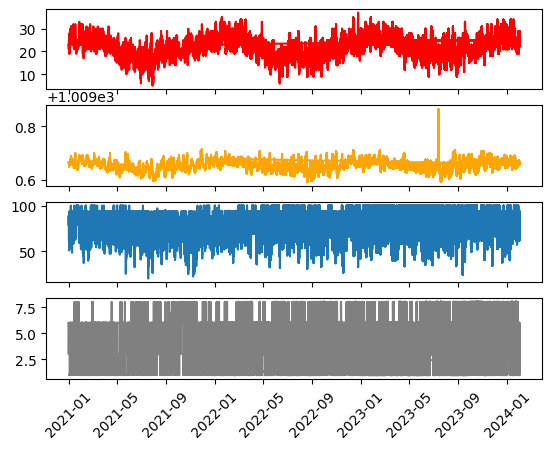

In [42]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da cco é:1009.6967607391396


{'whiskers': [<matplotlib.lines.Line2D at 0x18b6ee1c2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b6ee1f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b6cbd27d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18b6f993310>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b6f993650>],
 'means': []}

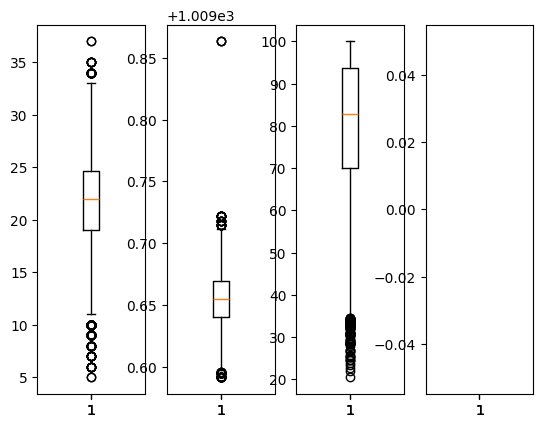

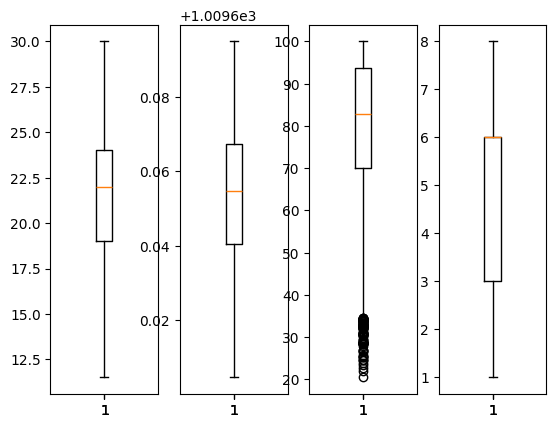

In [43]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:'+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))
# print(metSuperficie['temp']<temp99)
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:'+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])

C:\Users\Dell\AppData\Local\Temp\ipykernel_10640\2510533429.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_10640\2510533429.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2021-01-31  16.000000    1.0  2021.0  11.500000 NaN  214.774965  3.575005   
2021-02-28  14.500000    2.0  2021.0  11.500000 NaN  197.668222  3.371675   
2021-03-31  15.975741    3.0  2021.0  11.513477 NaN  224.959212  3.361566   
2021-04-30  15.500000    4.0  2021.0  11.500000 NaN  202.069544  3.382410   
2021-05-31  16.000000    5.0  2021.0  11.500000 NaN  230.860097  3.062866   
2021-06-30  15.500000    6.0  2021.0  11.500000 NaN  223.320988  3.332454   
2021-07-31  16.000000    7.0  2021.0  11.500000 NaN  246.718310  3.184159   
2021-08-31  16.000000    8.0  2021.0  11.500000 NaN  230.422406  3.678955   
2021-09-30  15.500000    9.0  2021.0  11.500000 NaN  231.086331  4.086376   
2021-10-31  16.343490   10.0  2021.0  11.515235 NaN  197.640862  4.067635   
2021-11-30  15.500000   11.0  2021.0  11.500000 NaN  200.488045  4.130533   

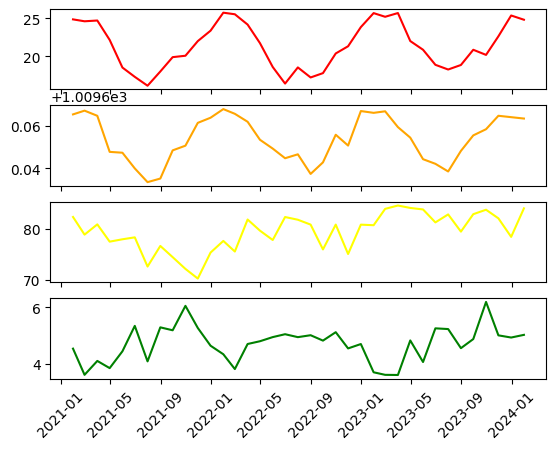

In [44]:
# Estatísticas dos dados

metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

#Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4, sharex = True)
ax[0].plot(media_mensal.index,media_mensal['temp'], color = 'red') #.index é o indice da matriz
ax[1].plot(media_mensal.index,media_mensal['p'], color = 'orange')
ax[2].plot(media_mensal.index,media_mensal['relh'], color = 'yellow')
ax[3].plot(media_mensal.index,media_mensal['cco'], color = 'green')
ax[3].tick_params(axis='x', rotation = 45)

print(media_mensal)
print(min_mensal)

#A media mensal pega a amostragem dos meses que são do mesmo ano e fazer a média.
#Após, cria outro dataframe, que tem as mesmas coluna do dt original
#Plotou no eixo x o indice, entao para a media mensal

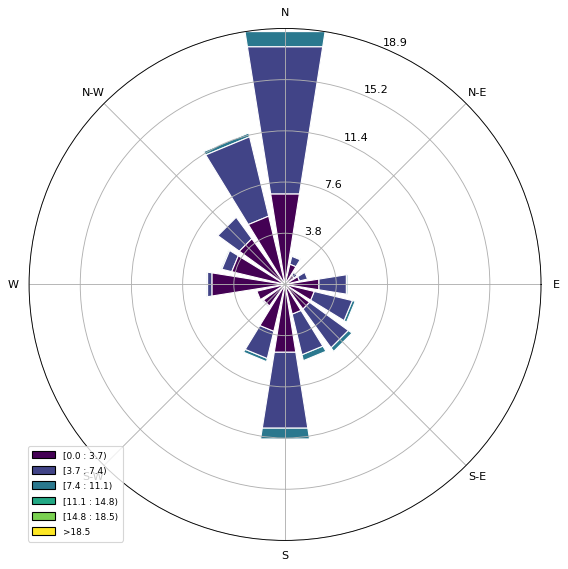

In [45]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Análise upperair/sondagem/perfil da atmosfera

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [47]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

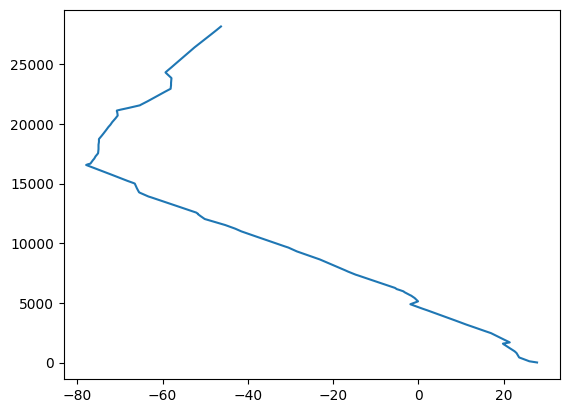

In [48]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

[-1.8        -0.74303406 -0.16574586 -0.30075188 -0.35714286 -0.43613707
 -0.42857143 -0.48780488 -0.32786885  1.53846154 -0.57416268 -0.56338028
 -0.82191781 -0.80139373 -0.80701754 -0.75362319 -0.77014218 -0.81481481
 -0.7651715   0.75675676  0.70175439 -0.28409091 -0.28846154 -0.41322314
 -0.39473684 -0.66666667 -0.52830189 -0.31746032 -0.80357143 -0.86419753
 -0.40816327 -0.82969432 -0.83003953 -0.82687339 -0.82417582 -0.89285714
 -0.69498069 -0.61946903 -0.65265487 -0.79881657 -0.61919505 -0.85106383
 -0.85106383 -0.81188119 -0.81325301 -0.80378251 -0.63636364 -0.71428571
 -0.77192982 -0.9486166  -0.40160643 -0.375       0.         -0.40816327
 -0.82568807 -0.82833133 -0.8974359  -0.63492063 -0.5        -0.15060241
 -0.12626263 -0.66666667 -0.77777778 -0.71969697 -0.73200993  0.71428571
  1.05263158  0.20338983  0.24390244  0.15873016  0.23255814  0.22556391
  0.          0.02941176  0.          0.          0.04291845  0.
  0.234375    0.2247191   0.2166065   0.20833333  0.2040816

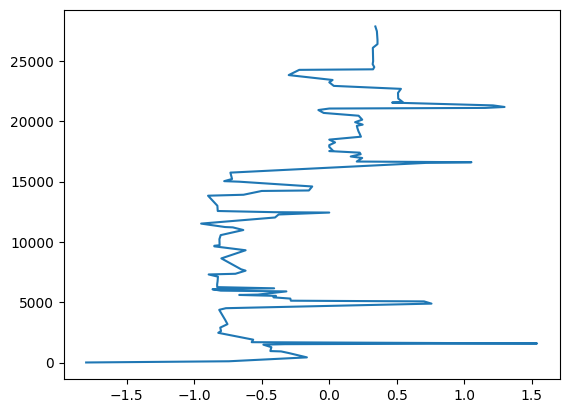

In [49]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

# Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


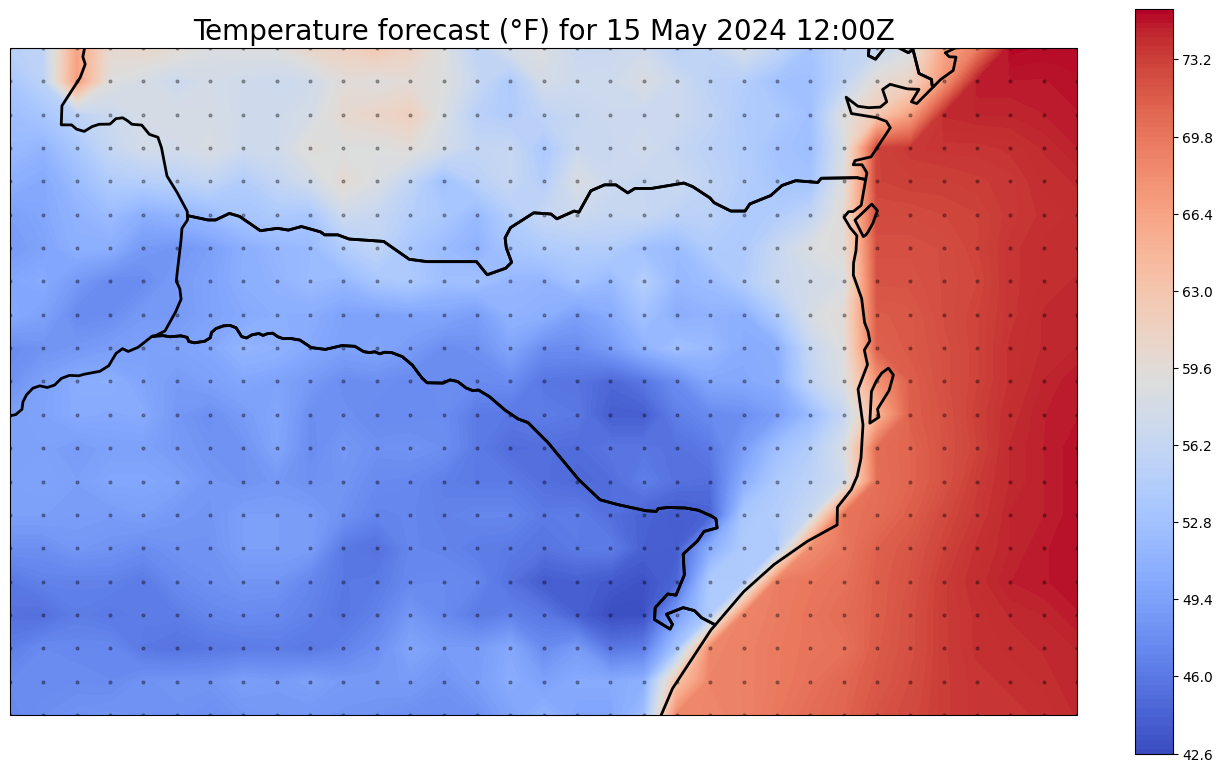

In [57]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-30, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55, -47, -30, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')
